# scatter_plot_prediction

scatter_plot_prediction is a method that displays violin or scatter plot.<br />
The purpose of these representations is to visualise correct or wrong prediction<br />
**Provide the y_target argument in the compile() method to display this plot**

<b>This tutorial </b>presents the different parameters you can<br />
use in *scatter_plot_prediction* to tune output, and results on classification and regression models


Contents:
- Building a classification model 
- Building a regression model 
- Display scatter plot prediction
- Focus on a subset
- Size of Random Sample


Data from Kaggle [Titanic](https://www.kaggle.com/c/titanic/data) for classification<br />
Data from Kaggle [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) for regression

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


## Building Supervized Model for Classification and compute Shapash

In [2]:
from shapash.data.data_loader import data_loading
titanic_df, titanic_dict = data_loading('titanic')
y_df=titanic_df['Survived'].to_frame()
X_df=titanic_df[titanic_df.columns.difference(['Survived'])]

In [3]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in X_df.columns if X_df[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(X_df)

X_df=encoder.transform(X_df)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, train_size=0.75, random_state=7)

In [4]:
clf = XGBClassifier(n_estimators=200,min_child_weight=2).fit(Xtrain,ytrain)

### First step: You need to Declare and Compile SmartExplainer 

In [5]:
from shapash import SmartExplainer

In [6]:
response_dict = {0: 'Death', 1:' Survival'}

In [7]:
xpl_classifier = SmartExplainer(
    model=clf,
    preprocessing=encoder, # Optional: compile step can use inverse_transform method
    features_dict=titanic_dict, # Optional parameters
    label_dict=response_dict    # Optional parameters, dicts specify labels 
) 

### To display scatter_plot_prediction, you have to fill "y_target"

In [8]:
xpl_classifier.compile(x=Xtest,
            y_target=ytest
            )

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7f827b54ff40>


## Building Supervized Model for Regression and compute Shapash

In [9]:
from shapash.data.data_loader import data_loading
house_df, house_dict = data_loading('house_prices')
y_df=house_df['SalePrice'].to_frame()
X_df=house_df[house_df.columns.difference(['SalePrice'])]

In [10]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in X_df.columns if X_df[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(X_df)

X_df=encoder.transform(X_df)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, train_size=0.75, random_state=1)

In [11]:
regressor = CatBoostRegressor(n_estimators=50).fit(Xtrain,ytrain,verbose=False)

### First step: You need to Declare and Compile SmartExplainer 

In [12]:
xpl_regressor = SmartExplainer(
    model=regressor,
    preprocessing=encoder, # Optional: compile step can use inverse_transform method
    features_dict=house_dict, # Optional parameter, dict specifies label for features name 
) 

### To display scatter_plot_prediction, you have to fill "y_target"

In [13]:
xpl_regressor.compile(x=Xtest,
            y_target=ytest
           )

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7f826b2d8a30>


## Display scatter plot prediction

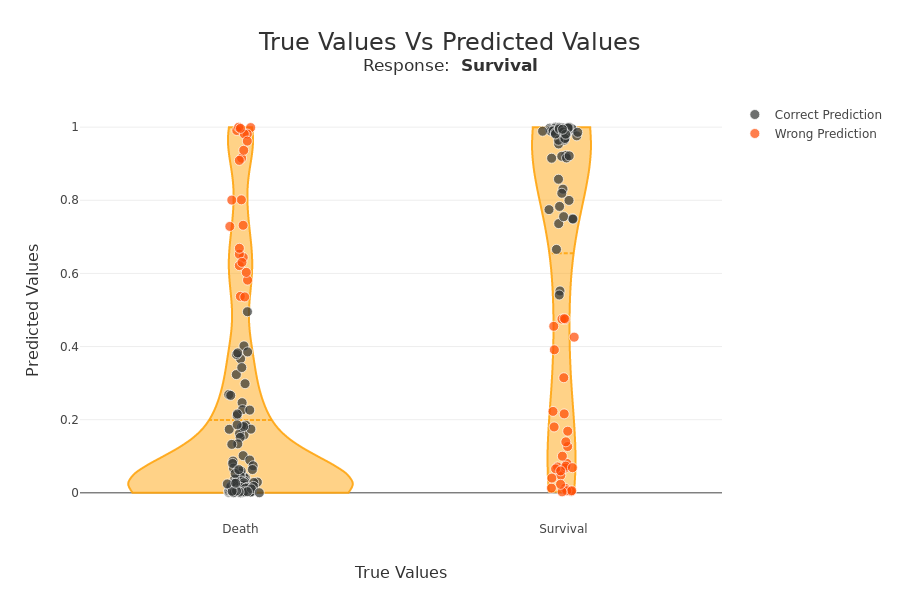

In [ ]:
xpl_classifier.plot.scatter_plot_prediction()

On the x-axis we have the actual class of samples. 
On the y-axis we have the probability of the classifier belonging to the default class (Survival in this case).<br />
For a binary classification, we find a sort of confusion matrix with the true negatives at the bottom left. On the top right, the true positives. On the top left, the false negatives. Bottom right, false positives.<br />
The violin plot represents the distribution of all the samples. 

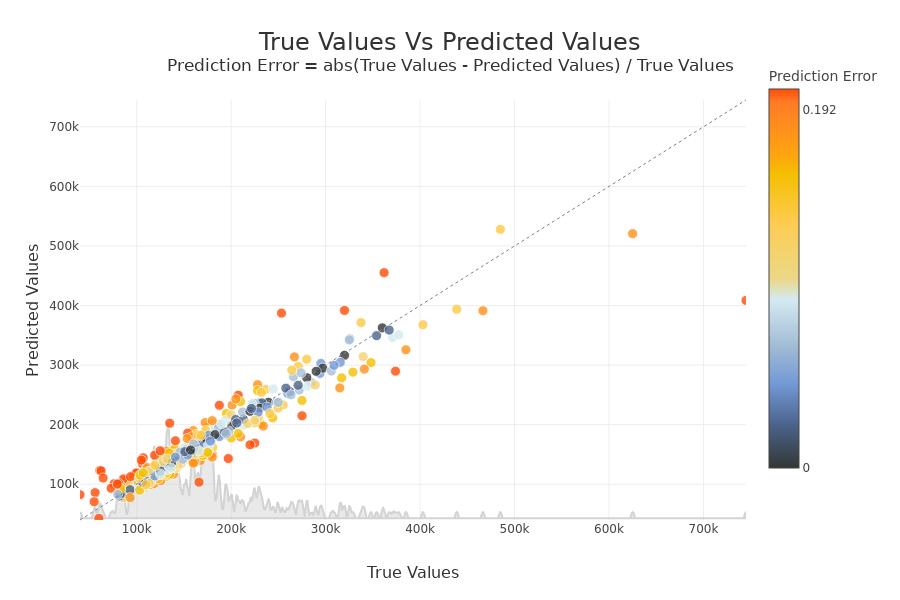

In [ ]:
xpl_regressor.plot.scatter_plot_prediction()

On the x-axis we have the actual values of samples. 
On the y-axis we have the predicted values.<br />
If a point is on the y = x line and is blue, then the prediction error is low. <br />
The further a point deviates from this line and is red, the higher the prediction error.  <br />
If there are no true values (y_target) at 0 as in this use case, the prediction error is calculated as follows : $Prediction Error = abs(True Values - Predicted Values) / True Values$ <br />
Else $Prediction Error = abs(True Values - Predicted Values)$

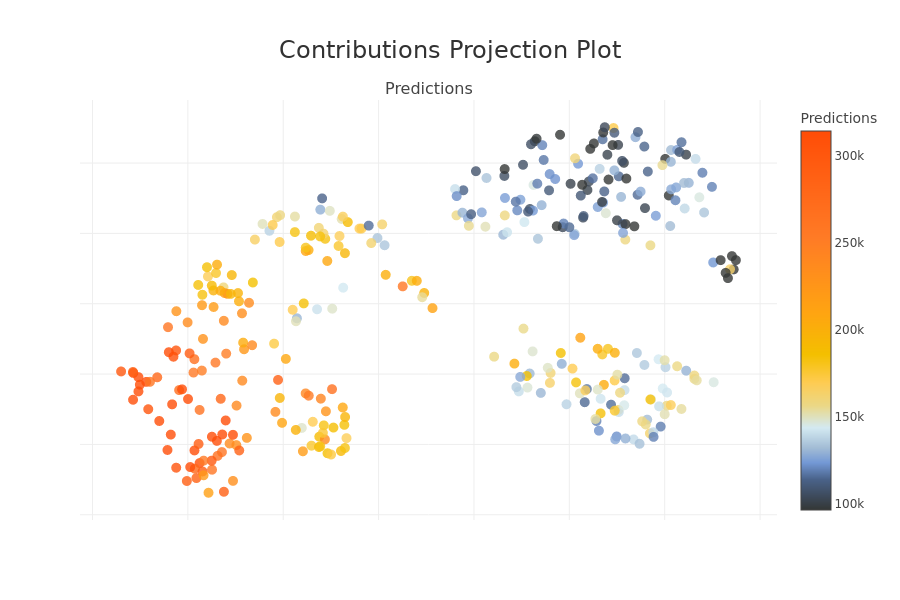

In [ ]:
xpl_regressor.plot.contributions_projection_plot(color_value="predictions")

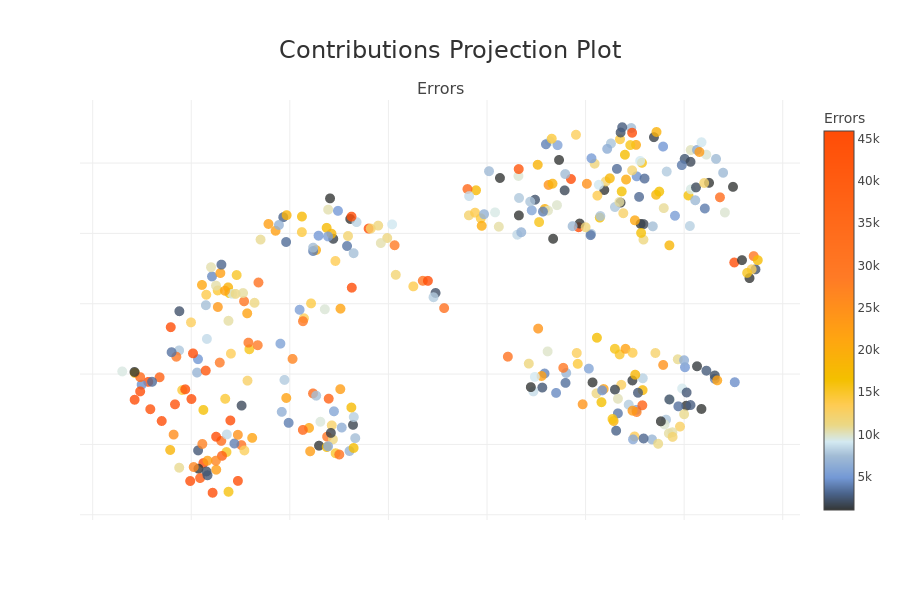

In [ ]:
xpl_regressor.plot.contributions_projection_plot(color_value="errors")

## Focus on a subset

With selection params you can specify a list of index of people you wand to focus

In [18]:
index = list(Xtest[xpl_regressor.x_init['YearBuilt'] > 1990].index.values)

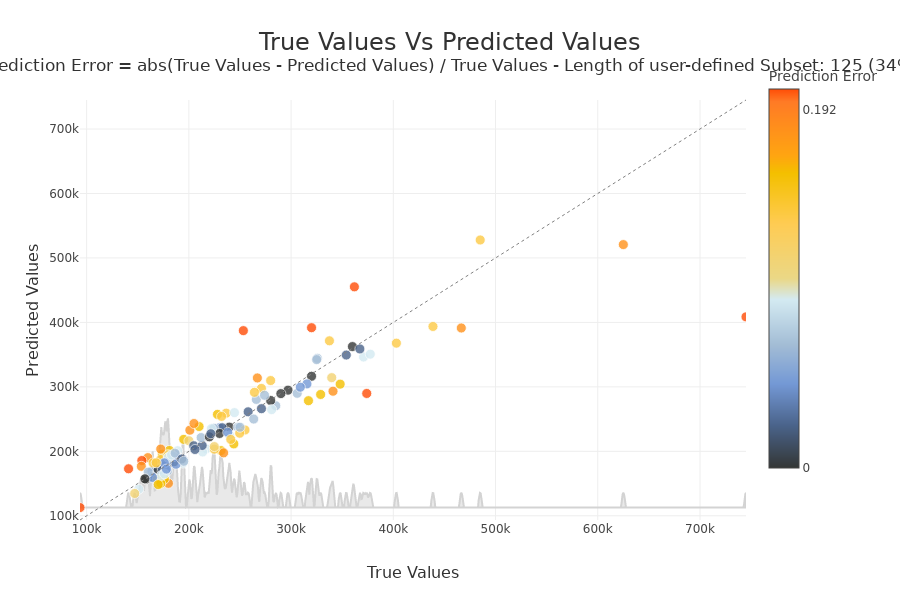

In [ ]:
xpl_regressor.plot.scatter_plot_prediction(selection=index, width=900, height=600)

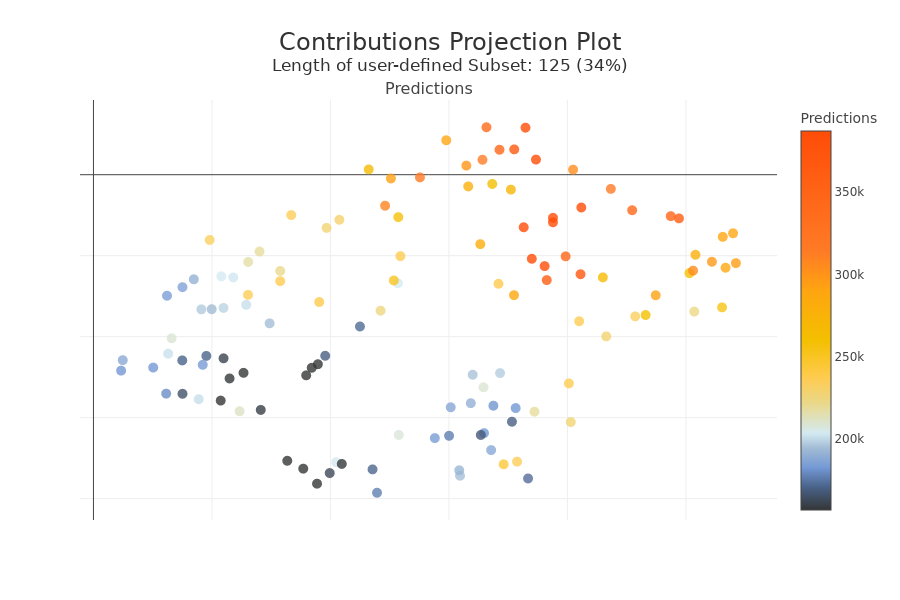

In [ ]:
xpl_regressor.plot.contributions_projection_plot(selection=index, color_value="predictions")

#### Classification Case: Use label parameter to select the target modality you want to focus

with label parameter, you can specify explicit label or label number  <br />
Very useful for multiclass.

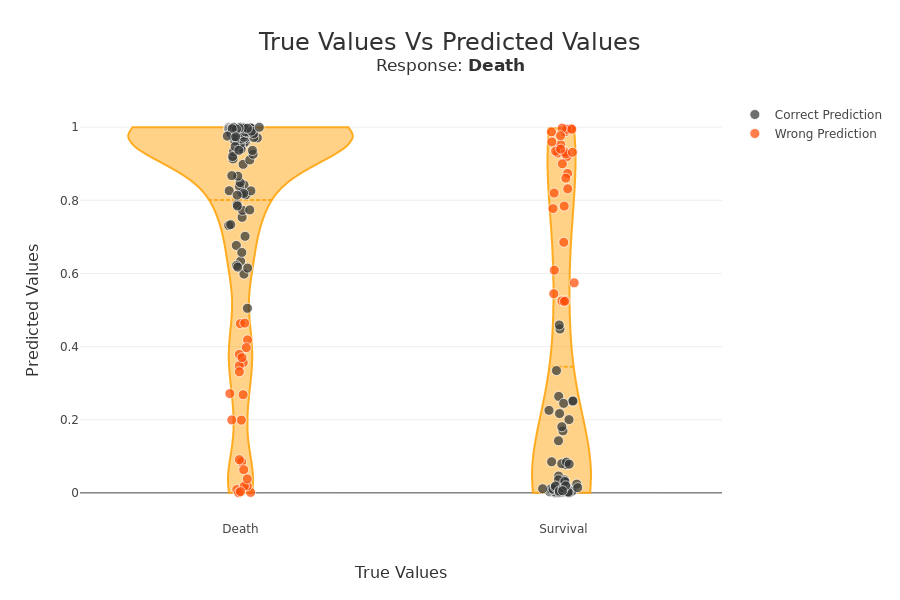

In [ ]:
xpl_classifier.plot.scatter_plot_prediction(label='Death')

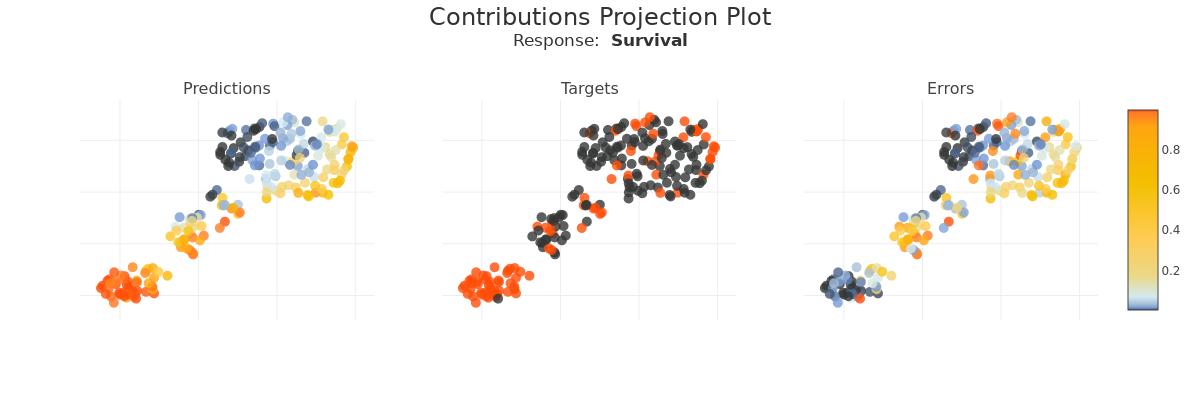

In [ ]:
xpl_classifier.plot.contributions_projection_plot(color_value=["predictions","targets","errors"], width=1200, height=800)

## Size of Random Sample

Method plot.scatter_plot_prediction use random sample to limit the number of points displayed.
Default size of this sample is 2000, but you can change it with the parameter max_points:

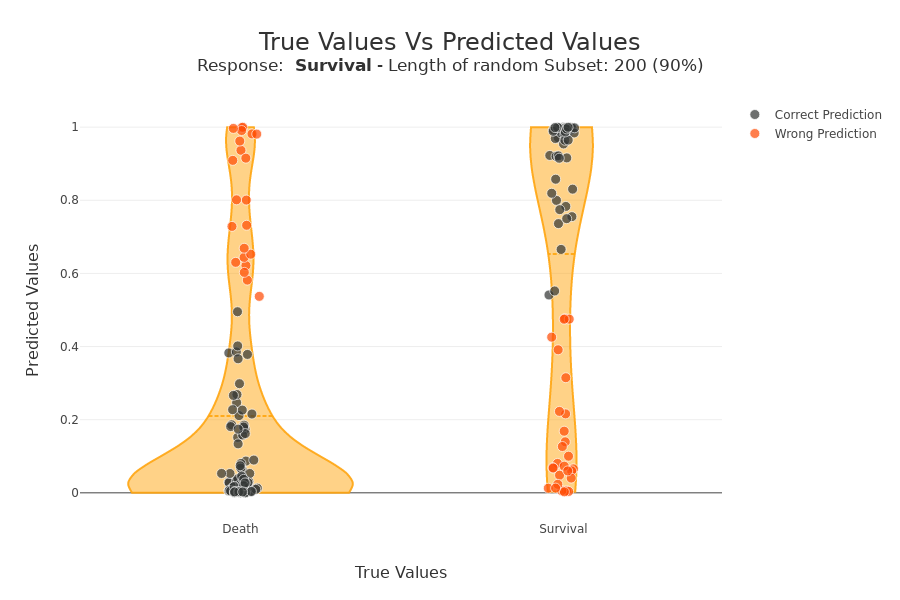

In [ ]:
xpl_classifier.plot.scatter_plot_prediction(max_points=200)

## Add y_target after compile
If the compile() took a long time and you forgot to fill in y_target, you can also add it with the add method

In [24]:
xpl_regressor = SmartExplainer(
    model=regressor,
    preprocessing=encoder, # Optional: compile step can use inverse_transform method
    features_dict=house_dict, # Optional parameter, dict specifies label for features name 
) 

In [25]:
xpl_regressor.compile(x=Xtest,
            #y_target=ytest
           )

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7f8304e639a0>


In [26]:
xpl_regressor.add(y_target=ytest)

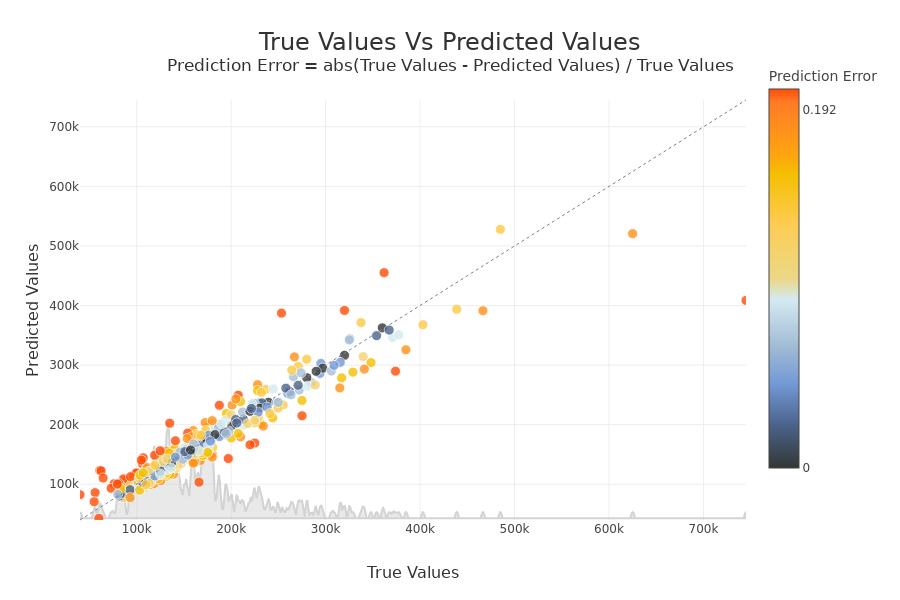

In [ ]:
xpl_regressor.plot.scatter_plot_prediction()